In [1]:
# DIKKAT `INT_1` TEAM UYESI ---> LUTFEN OKU:)) 

# Calismaya baslamadan once Github Desktop'ta Branchinda oldugundan emin ol!
# Main branch'i kendi Branch'ina aktarmayi (merge) unutma
# Sadece ve sadece kendi Branchinda kal!
# Kendi Branch'inda iken calis ve COMMIT yap! 

# Github Proje klasorunde SADECE sana ayrilmis olan klasorunde calis-degisiklik yap. 
# Baskasinin veya ortak bir dosyada asla degisiklik yapma!
# Buddy arkadasin ile ortak notebooklarinizda degisiklik yapmadan once onunla haberles! 

# HIC Emin degilsen PROJENIN GUVENLIGI ICIN github proje klasoru disinda bireysel bir klasorunde datalari kopyalayip alabilir ve lokalinde calisabilirsin. 
# Calismandan emin olduktan sonra gerekli dosyalari Github Proje klasoru icinde sana ayrilmis olan dosya icine ekleyebilirin
# GitHub'a COMMIT-PUSH yaptiginda --> slackta --> GITHUB_UPDATE kanalindan bilgi vermeyi unutma!!

# UTILS classinda isini kolaylastiracak fonksiyonlar ekledik, goz atabilirsin, asagida nasil kullancagini gosterdik.
# Eger sende kullanisli bir fonksiyon bulursan UTILS classina uygun hale getirip-calistirip-test ettikten sonra 
#  benimle paylasirsan ortak utils dosyasina code'unu eklerim, diger arkadaslarinin da isini kolaylastirmis olursun:)

# Okudugun icin tesekkurler iyi calismalar:)) 

# GOLDBERG MED GmbH URETIM-TAKIP-SATIS ANALIZI

**Giriş**

Bu proje, Goldberg Med GmbH’nin satış performansını analiz etmek ve iş süreçlerini iyileştirmek için Keşifsel Veri Analizi (EDA) yöntemlerini kullanmayı amaçlayacaktır. Projenin temel hedefi, mevcut veriyi anlamak, olası sorunları belirlemek ve şirketin stratejik karar alma süreçlerine katkıda bulunmaktır.

**Proje Hedefleri:**

1. Mevcut veri setini inceleyerek verinin yapısını ve özelliklerini anlamak.
2. Satış performansı ile ilgili temel trendleri ve desenleri keşfetmek.
3. Verinin kalitesini artırmak için temizleme işlemleri yapmak (eksik ve anormal verileri tespit ve düzeltme).
4. Elde edilen bulgular doğrultusunda, şirketin pazardaki konumunu güçlendirecek öneriler geliştirmek.

**Proje Adımları:**

1. **Veri Toplama ve Tanımlama:** Şirketten elde edilen satış verileri ve iş süreçlerine dair bilgiler incelenecek ve analiz için hazırlanacaktır.
2. **Keşifsel Veri Analizi (EDA):** 
3. **Veri Temizleme:** Veri setindeki eksik veya hatalı veriler tespit edilerek gerekli düzenlemeler yapılacaktır.
3. **Analiz ve Gorsellestirme:** Verinin genel dağılımı, temel istatistikler ve görselleştirme teknikleri ile incelenecektir. Bu adımda, verinin temel trendleri ve değişkenler arasındaki ilişkiler analiz edilecektir.
4. **Bulgular ve Yorumlar:** Elde edilen analiz sonuçları yorumlanarak, satış performansını etkileyen faktörler üzerine odaklanılacaktır.
5. **Sonuçlar ve Öneriler:** Şirketin satışlarını artırmaya yönelik stratejik öneriler geliştirilecek ve ileriye dönük analizlerin yapılması için yol haritası sunulacaktır.

**Sonuçlar:**

Bu proje, Goldberg Med GmbH’nin satış verilerini analiz ederek, performansı artırmaya yönelik içgörüler sunacaktır. Analiz süreci, şirketin iş süreçlerinde verimliliği artırabilecek potansiyel alanları belirleyecek ve bu alanlarda uygulanabilecek stratejiler geliştirecektir. Elde edilen veriler doğrultusunda, şirketin pazar payını artırmak ve satışları optimize etmek için uygulanabilecek öneriler raporda detaylı olarak sunulacaktır.

## Imports Libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import cufflinks as cf
%matplotlib inline 
import os
import sys
from scipy import stats


pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

import warnings
warnings.filterwarnings("ignore")

## Load the Data

In [3]:
# Dataseti kendi klasorune kopyala al ve direk okut

df0 = pd.read_csv('merged_satis_uretim_data_27_Ekim.csv')
df = df0.copy()

df.head(2)

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,aciklama,solusyon_fatura,bidon_acilisi,uts_no
0,AMELIYAT MASASI,ÖZEL,2018/006,6/29/2018,ÖZEL FSM TIP MERKEZİ,ÖZEL FSM TIP MERKEZİ,İSTANBUL,GOLDBERG 5S,AMELİYAT MASASI,*,2018/02-012,20 GÜN,7/18/2018,NaN,NaN,NaN,NaN,NaN
1,AMELIYAT MASASI,DEMO,2018/007,2/14/2018,DEMO,DERİNCE EĞİTİM VE ARAŞTIRMA HASTANESİ,KOCAELİ,GOLDBERG 5S,AMELİYAT MASASI,*,2018/02-003,21 GÜN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# # Veya Uzak bir klasordeki dataseti-dosyayi okumak icin dosya yolunu ver;

# # Dosya yolunu belirtelim
# file_path = r"C:\Users\duygu\Desktop\00-GitHub-Repo\00-1INTERNSHIP\01_EDA\FEATURES\04_Siparis_Teslim_IrsaliyeDate_TeslimSure\Duygu\merged_satis_uretim_data_27_Ekim.csv"

# # CSV dosyasını okuyalım
# try:
#     df_total = pd.read_csv(file_path)
#     # İlk birkaç satırı göstereceğiz
#     df_total.head()
# except FileNotFoundError:
#     "Dosya yolunda bir hata olabilir veya dosya mevcut olmayabilir."

    
# df = df_total.copy()  
# df.head(2)

## Import Local `utils1` Modul

In [4]:
#  FONKSIYONLARIMIZI DERLEDIGIMIZ `UTILS` ADINDAKI MODULU BU NOTEBOOK ICINE IMPORT EDIYORUZ

import sys

# utils1.py dosyasının bulunduğu dizini ham dize olarak ekleyin
sys.path.append(r"C:\Users\duygu\Desktop\00-GitHub-Repo\00-1INTERNSHIP\10_UTILITIES")

# 'utils.py' dosyasında olusturulan Utils sınıfını import et
from utilsAnalysis import UtilsAnalysis

# utils1 icindeki tum class'lardan bir nesne oluştur
utils = UtilsAnalysis()

In [5]:
# utils nesnesindeki tüm fonksiyonları ve öznitelikleri listelemek için
dir(utils)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'detect_anomalies',
 'df',
 'duplicate_values',
 'find_non_numeric_values',
 'get_value_count',
 'groupby_get_null_values',
 'groupby_get_values',
 'missing_values',
 'na_ratio_plot',
 'numeric_summary',
 'object_summary']

### Utils class'indan Fonk Cagirma:

In [6]:
# Utils classindaki fonk kullanmak icin utils objesine dataframe'i tanimla

utils.df = df 

# merged_satis_uretim_data_27_Ekim df tanimlandi
# `utils` objesi ile bu classta bulunan tum fonksiyonlari direk df uzerinde uygulayacak.

In [7]:
help(utils.missing_values) # utils classta ekledigimiz bir fonksiyon hakkinda bilgi edinebiliriz

Help on method missing_values in module utilsAnalysis:

missing_values() method of utilsAnalysis.UtilsAnalysis instance
    DataFrame'deki eksik değerlerin sayısını ve yüzdesini hesaplar.



# EXPLORATORY DATA ANALYSIS (EDA)¶

## Understanding the the Data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32646 entries, 0 to 32645
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   kategori         32646 non-null  object 
 1   satis_turu       29480 non-null  object 
 2   siparis_no       27743 non-null  object 
 3   siparis_tarihi   30830 non-null  object 
 4   siparisi_veren   31216 non-null  object 
 5   kurulum_yeri     2519 non-null   object 
 6   il               31083 non-null  object 
 7   urun_modeli      2450 non-null   object 
 8   urun_adi         31119 non-null  object 
 9   litre            2245 non-null   object 
 10  seri_no          32443 non-null  object 
 11  teslim_suresi    2223 non-null   object 
 12  teslim_tarihi    2146 non-null   object 
 13  irsaliye_tarihi  8 non-null      object 
 14  aciklama         11627 non-null  object 
 15  solusyon_fatura  5369 non-null   object 
 16  bidon_acilisi    5369 non-null   object 
 17  uts_no      

In [9]:
df.duplicated().sum()

169

In [10]:
utils.object_summary()

1. Data shape (rows, columns): (32646, 18)
2. Number of duplicate rows: 169


,Dtype,Counts,Nulls,NullPercent,Top,Frequency,Uniques,UniqueValues
kategori,object,32646,0,0.000000,KARTUS,30126,7,"AMELIYAT MASASI, OTOKLAV, HIDROJEN PEROKSIT, K..."
satis_turu,object,29480,3166,9.697972,ÖZEL,8977,57,"ÖZEL, DEMO, YURTDIŞI, DMO, İHALE, 2021 DE SATI..."
siparis_no,object,27743,4903,15.018685,2024/71,1000,2649,"2018/006, 2018/007, 2018/008, 2018/009, 2018/0..."
siparis_tarihi,object,30830,1816,5.562703,5/22/2024 0:00,1027,1449,"6/29/2018, 2/14/2018, 10/23/2018, 9/3/2018, 2/..."
siparisi_veren,object,31216,1430,4.380322,ROMANYA,1341,856,"ÖZEL FSM TIP MERKEZİ, DEMO, İZMİR KATİP ÇELEBİ..."
kurulum_yeri,object,2519,30127,92.283894,KAMBOÇYA,137,775,"ÖZEL FSM TIP MERKEZİ, DERİNCE EĞİTİM VE ARAŞTI..."
il,object,31083,1563,4.787723,ANKARA,4386,194,"İSTANBUL, KOCAELİ, İZMİR, TAYLAND, AZERBEYCAN,..."
urun_modeli,object,2450,30196,92.495252,GOLDBERG 5S,215,176,"GOLDBERG 5S, ERM 2000 F, STR 2000 F, 2000 F, G..."
urun_adi,object,31119,1527,4.677449,KARTUŞ,28794,124,"AMELİYAT MASASI, 422 LT ÇİFT KAPILI OTOKLAV Cİ..."
litre,object,2245,30401,93.123200,*,269,59,"*, OBEZ, nan, aşağıda, 422 LİTRE, 2000 LİTRE, ..."


In [11]:
utils.numeric_summary()

1. Data shape (rows, columns): (32646, 18)
2. Number of duplicate rows: 169


,Dtype,Counts,Nulls,NullPercent,Mean,Std,Min,25%,50% (Median),75%,Max
uts_no,float64,3,32643,99.990811,8.697610e+12,0.0,8.697610e+12,8.697610e+12,8.697610e+12,8.697610e+12,8.697610e+12


## Data Cleaning and Transformation

In [12]:
utils.missing_values()

Eksik değerlerin sütun bazında dökümü aşağıda verilmiştir:


,Eksik Değer Sayısı,Yüzde
kategori,0,0.00%
satis_turu,3166,9.70%
siparis_no,4903,15.02%
siparis_tarihi,1816,5.56%
siparisi_veren,1430,4.38%
kurulum_yeri,30127,92.28%
il,1563,4.79%
urun_modeli,30196,92.50%
urun_adi,1527,4.68%
litre,30401,93.12%


Eksik değer sayısı (0'dan fazla olan sütunlar):
satis_turu          3166
siparis_no          4903
siparis_tarihi      1816
siparisi_veren      1430
kurulum_yeri       30127
il                  1563
urun_modeli        30196
urun_adi            1527
litre              30401
seri_no              203
teslim_suresi      30423
teslim_tarihi      30500
irsaliye_tarihi    32638
aciklama           21019
solusyon_fatura    27277
bidon_acilisi      27277
uts_no             32643
dtype: int64


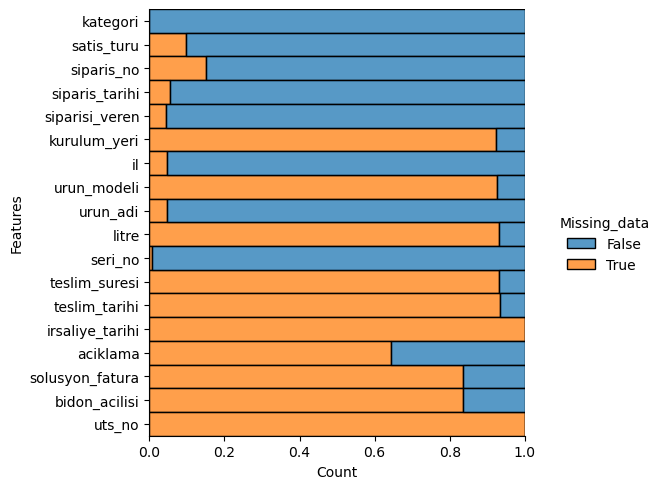

In [31]:
utils.na_ratio_plot()

### Kategorik GroupBy

In [32]:
df_filtered.groupby('kategori').apply(lambda x: x.notnull().sum())

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,aciklama,solusyon_fatura,bidon_acilisi,uts_no
kategori,,,,,,,,,,,,,,,,,,
AMELIYAT MASASI,475,475,475,475,475,475,473,475,475,271,438,423,408,0,0,0,0,0
HIDROJEN PEROKSIT,135,135,134,134,135,135,134,135,135,135,134,135,126,2,0,0,0,0
OKSIJEN,71,71,70,70,70,70,70,70,10,2,70,43,65,0,0,0,0,3
OTOKLAV,1242,1242,1242,1242,1242,1242,1228,1181,1242,1242,1176,1047,982,6,0,0,0,0
REVERSE OSMOS,204,201,195,199,204,204,202,204,70,202,204,192,190,0,0,0,0,0
YIKAMA,393,393,393,393,393,393,391,385,393,393,383,383,372,0,0,0,0,0


In [33]:
utils.groupby_get_values() # siparis_tarihi,teslim_suresi,teslim_tarihi,irsaliye_tarihi

Mevcut sütunlar:
kategori | satis_turu | siparis_no | siparis_tarihi | siparisi_veren | kurulum_yeri | il | urun_modeli | urun_adi | litre | seri_no | teslim_suresi | teslim_tarihi | irsaliye_tarihi | aciklama | solusyon_fatura | bidon_acilisi | uts_no

Lütfen groupby yapılacak sütunu seçiniz (örneğin: kategori, teslim_tarihi vb.): kategori

Değerlerini görmek istediğiniz diğer sütunları virgülle ayırarak giriniz (örneğin: fiyat, adet, tarih): siparis_tarihi,teslim_suresi,teslim_tarihi,irsaliye_tarihi

# Gruplandırılmış DataFrame (Dolu Değerler):



,kategori,siparis_tarihi,teslim_suresi,teslim_tarihi,irsaliye_tarihi
0,AMELIYAT MASASI,475,423,408,0
1,HIDROJEN PEROKSIT,134,135,126,2
2,KARTUS,28317,0,3,0
3,OKSIJEN,70,43,65,0
4,OTOKLAV,1242,1047,982,6
5,REVERSE OSMOS,199,192,190,0
6,YIKAMA,393,383,372,0


In [34]:
utils.groupby_get_null_values() # #siparis_tarihi,teslim_suresi,teslim_tarihi,irsaliye_tarihi

Mevcut sütunlar:
kategori | satis_turu | siparis_no | siparis_tarihi | siparisi_veren | kurulum_yeri | il | urun_modeli | urun_adi | litre | seri_no | teslim_suresi | teslim_tarihi | irsaliye_tarihi | aciklama | solusyon_fatura | bidon_acilisi | uts_no

Lütfen index olarak kullanılacak sütunu seçiniz (örneğin: kategori, teslim_tarihi vb.): kategori

Null değerlerini görmek istediğiniz diğer sütunları virgülle ayırarak giriniz (örneğin: fiyat, adet, tarih): siparis_tarihi,teslim_suresi,teslim_tarihi,irsaliye_tarihi

# Gruplandırılmış DataFrame (Null Değerler):



,kategori,siparis_tarihi,teslim_suresi,teslim_tarihi,irsaliye_tarihi
0,AMELIYAT MASASI,0,52,67,475
1,HIDROJEN PEROKSIT,1,0,9,133
2,KARTUS,1809,30126,30123,30126
3,OKSIJEN,1,28,6,71
4,OTOKLAV,0,195,260,1236
5,REVERSE OSMOS,5,12,14,204
6,YIKAMA,0,10,21,393


In [14]:
# Belirtilen sütunları filtreleyerek yeni bir DataFrame oluşturma

columns_to_filter = ["siparis_tarihi", "teslim_suresi", "teslim_tarihi", "irsaliye_tarihi"]

date_columns = df[columns_to_filter]
date_columns.head()

,siparis_tarihi,teslim_suresi,teslim_tarihi,irsaliye_tarihi
0,6/29/2018,20 GÜN,7/18/2018,NaN
1,2/14/2018,21 GÜN,NaN,NaN
2,10/23/2018,DERHAL,NaN,NaN
3,9/3/2018,7 GÜN,9/7/2018,NaN
4,2/28/2018,8 GÜN,NaN,NaN


In [36]:
# date_columns DataFrame'ini CSV olarak kaydetme
#date_columns.to_csv('date_columns.csv', index=False)

In [15]:
df_dates = pd.read_csv('date_columns.csv')
df_dates.head(2)

,siparis_tarihi,teslim_suresi,teslim_tarihi,irsaliye_tarihi
0,6/29/2018,20 GÜN,7/18/2018,NaN
1,2/14/2018,21 GÜN,NaN,NaN


In [16]:
df_dates[['teslim_suresi']]

,teslim_suresi
0,20 GÜN
1,21 GÜN
2,DERHAL
3,7 GÜN
4,8 GÜN
...,...
32641,267
32642,60 gün
32643,60 gün
32644,60 gün


In [18]:
utils.df = df_dates

### siparis_tarihi

In [20]:
utils.get_value_count()

AttributeError: 'UtilsAnalysis' object has no attribute 'set_column'

In [41]:
utils.find_non_numeric_values() #Sütun adı: siparis_tarihi

Mevcut sütunlar:
kategori | satis_turu | siparis_no | siparis_tarihi | siparisi_veren | kurulum_yeri | il | urun_modeli | urun_adi | litre | seri_no | teslim_suresi | teslim_tarihi | irsaliye_tarihi | aciklama | solusyon_fatura | bidon_acilisi | uts_no

Lütfen analiz etmek istediğiniz sütun adını yazınız (örn: 'siparis_no'):


KeyboardInterrupt: Interrupted by user

### teslim_suresi

In [21]:
utils.find_non_numeric_values() #Sütun adı: teslim_suresi

Mevcut sütunlar:
kategori | satis_turu | siparis_no | siparis_tarihi | siparisi_veren | kurulum_yeri | il | urun_modeli | urun_adi | litre | seri_no | teslim_suresi | teslim_tarihi | irsaliye_tarihi | aciklama | solusyon_fatura | bidon_acilisi | uts_no

Lütfen analiz etmek istediğiniz sütun adını yazınız (örn: 'siparis_no'):
Sütun adı: teslim_suresi
'teslim_suresi' sütununda bulunan benzersiz sayısal olmayan değerler:


{' ',
 '  GÜN ',
 ' (ALYANS MEDİKALE GÖNDERİLEN CİHAZ İLE AYNI SERİ NUMARASI İLE ÜRETİLDİ) ',
 ' -',
 ' GÜN ',
 ' GÜN  ',
 ' GÜN   ',
 ' GÜN DERHAL ',
 ' GÜN SERİ NUMARASI İPTAL OLDU ',
 ' HAFTA ',
 ' HAFTA  ',
 ' IRAKTI STOK OLDU ',
 ' SERVİSİN MASASI YERİNE YENİ BİNASI İÇİN DEMO OLARAK BIRAKILDI ',
 ' cihaz geri geldi. ',
 ' gün',
 ' gün ',
 '-',
 '/',
 ':',
 'GÜN '}

### teslim_tarihi

In [22]:
utils.find_non_numeric_values() #teslim_tarihi

Mevcut sütunlar:
kategori | satis_turu | siparis_no | siparis_tarihi | siparisi_veren | kurulum_yeri | il | urun_modeli | urun_adi | litre | seri_no | teslim_suresi | teslim_tarihi | irsaliye_tarihi | aciklama | solusyon_fatura | bidon_acilisi | uts_no

Lütfen analiz etmek istediğiniz sütun adını yazınız (örn: 'siparis_no'):
Sütun adı: teslim_tarihi
'teslim_tarihi' sütununda bulunan benzersiz sayısal olmayan değerler:


{' ',
 ' DERHAL ',
 ' DERHAL DERHAL ',
 ' GÜN ',
 '-TL YUSUF BAYRAMA VERİLDİ. YUSUF BAYRAMA VERİLDİ. ',
 '.',
 '..',
 '/',
 ':'}

### irsaliye_tarihi

In [23]:
utils.find_non_numeric_values() #irsaliye_tarihi 

Mevcut sütunlar:
kategori | satis_turu | siparis_no | siparis_tarihi | siparisi_veren | kurulum_yeri | il | urun_modeli | urun_adi | litre | seri_no | teslim_suresi | teslim_tarihi | irsaliye_tarihi | aciklama | solusyon_fatura | bidon_acilisi | uts_no

Lütfen analiz etmek istediğiniz sütun adını yazınız (örn: 'siparis_no'):
Sütun adı: irsaliye_tarihi
'irsaliye_tarihi' sütununda bulunan benzersiz sayısal olmayan değerler:


{' ',
 ' KASET KARŞILIĞI GÖNDERİLMİŞTİR. GAZ KASETİ KARŞILIĞI GÖNDERİLMİŞTİR.',
 '/',
 ':',
 'cihaz gitti. kazan yok - nerede DUBAİ FUARA GİDİP GELDİ VE CEZAYİRE SATILDI. NOT: DEPREM BÖLGESİ İÇİN SİPARİŞ VERİLDİ NİĞDEYE KURULMUŞ. SİPARİŞİ GELMEDİ '}

In [24]:
utils.detect_anomalies()

Mevcut sütunlar:
kategori | satis_turu | siparis_no | siparis_tarihi | siparisi_veren | kurulum_yeri | il | urun_modeli | urun_adi | litre | seri_no | teslim_suresi | teslim_tarihi | irsaliye_tarihi | aciklama | solusyon_fatura | bidon_acilisi | uts_no

Lütfen analiz etmek istediğiniz sütun adını yazınız:
Sütun adı: irsaliye_tarihi
'irsaliye_tarihi' sütununda alfasayısal olmayan karakterler tespit edildi:


'cihaz gitti., kazan yok - nerede, DUBAİ FUARA GİDİP GELDİ VE CEZAYİRE SATILDI., NOT: DEPREM BÖLGESİ İÇİN SİPARİŞ VERİLDİ NİĞDEYE KURULMUŞ., SİPARİŞİ GELMEDİ, 6/19/2024 0:00, KASET KARŞILIĞI GÖNDERİLMİŞTİR., GAZ KASETİ KARŞILIĞI GÖNDERİLMİŞTİR.'

In [25]:
utils.find_non_numeric_values()

Mevcut sütunlar:
kategori | satis_turu | siparis_no | siparis_tarihi | siparisi_veren | kurulum_yeri | il | urun_modeli | urun_adi | litre | seri_no | teslim_suresi | teslim_tarihi | irsaliye_tarihi | aciklama | solusyon_fatura | bidon_acilisi | uts_no

Lütfen analiz etmek istediğiniz sütun adını yazınız (örn: 'siparis_no'):
Sütun adı: irsaliye_tarihi
'irsaliye_tarihi' sütununda bulunan benzersiz sayısal olmayan değerler:


{' ',
 ' KASET KARŞILIĞI GÖNDERİLMİŞTİR. GAZ KASETİ KARŞILIĞI GÖNDERİLMİŞTİR.',
 '/',
 ':',
 'cihaz gitti. kazan yok - nerede DUBAİ FUARA GİDİP GELDİ VE CEZAYİRE SATILDI. NOT: DEPREM BÖLGESİ İÇİN SİPARİŞ VERİLDİ NİĞDEYE KURULMUŞ. SİPARİŞİ GELMEDİ '}

## DF Without `kartus`

In [12]:
# 'KARTUS' kategorisini hariç tutarak yeni bir DataFrame oluşturma
df_filtered = df[df['kategori'] != 'KARTUS']
df_filtered.head(2)

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,aciklama,solusyon_fatura,bidon_acilisi,uts_no
0,AMELIYAT MASASI,ÖZEL,2018/006,6/29/2018,ÖZEL FSM TIP MERKEZİ,ÖZEL FSM TIP MERKEZİ,İSTANBUL,GOLDBERG 5S,AMELİYAT MASASI,*,2018/02-012,20 GÜN,7/18/2018,NaN,NaN,NaN,NaN,NaN
1,AMELIYAT MASASI,DEMO,2018/007,2/14/2018,DEMO,DERİNCE EĞİTİM VE ARAŞTIRMA HASTANESİ,KOCAELİ,GOLDBERG 5S,AMELİYAT MASASI,*,2018/02-003,21 GÜN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Kategorilere göre her sütundaki dolu değerlerin sayısını hesaplayan DataFrame
category_counts_df_filtered = df_filtered.groupby('kategori').apply(lambda x: x.notnull().sum())

# Sonucu görüntülemek için
category_counts_df_filtered

,kategori,satis_turu,siparis_no,siparis_tarihi,siparisi_veren,kurulum_yeri,il,urun_modeli,urun_adi,litre,seri_no,teslim_suresi,teslim_tarihi,irsaliye_tarihi,aciklama,solusyon_fatura,bidon_acilisi,uts_no
kategori,,,,,,,,,,,,,,,,,,
AMELIYAT MASASI,475,475,475,475,475,475,473,475,475,271,438,425,406,82,0,0,0,0
HIDROJEN PEROKSIT,135,135,134,134,135,135,134,135,135,135,134,135,126,2,0,0,0,0
OKSIJEN,71,71,70,70,70,70,70,70,10,2,70,43,65,0,0,0,0,3
OTOKLAV,1242,1242,1242,1242,1242,1242,1228,1181,1242,1242,1176,1047,982,6,0,0,0,0
REVERSE OSMOS,204,201,195,199,204,204,202,204,70,202,204,192,190,0,0,0,0,0
YIKAMA,393,393,393,393,393,393,391,385,393,393,383,383,372,0,0,0,0,0


In [18]:
utils.df = df_filtered

In [19]:
utils.missing_values()

Eksik değerlerin sütun bazında dökümü aşağıda verilmiştir:


,Eksik Değer Sayısı,Yüzde
kategori,0,0.00%
satis_turu,3,0.12%
siparis_no,11,0.44%
siparis_tarihi,7,0.28%
siparisi_veren,1,0.04%
kurulum_yeri,1,0.04%
il,22,0.87%
urun_modeli,70,2.78%
urun_adi,195,7.74%
litre,275,10.91%


## Distributions

- Feature'larinizin detayli analiz ve gorsellestirilmesi

## Correlations

## Feature Engineering

## Feature Selection
- Hangi feauture model icin kullanilmali-neden?

## Save Cleaned Data

# Bulgular ve Yorumlar

# Sonuçlar ve Öneriler